In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [5]:
svm_iris = SVC(kernel='linear')
svm_iris.fit(X_train, y_train)
y_pred = svm_iris.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



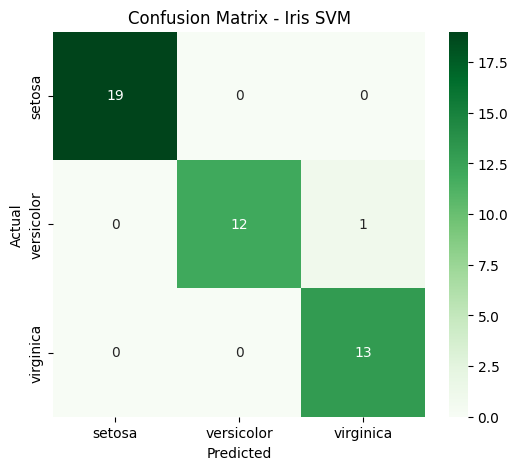

In [6]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Iris SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # Setosa-like features
sample_scaled = scaler.transform(sample)

pred = svm_iris.predict(sample_scaled)
print("Predicted class:", iris.target_names[pred[0]])


Predicted class: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
